**ARCHIE MANALO**

**BSCS 4B**

**CSST 106**

**EXERCISE 4**

In [1]:
# Step 1: Install necessary libraries
!pip install opencv-python-headless scikit-image matplotlib

In [112]:
# Step 2: Import required libraries
import cv2
from skimage.feature import hog
import matplotlib.pyplot as plt
import numpy as np
import os
from skimage import exposure

In [113]:
# Step 3 Load your image
image = cv2.imread("kuto.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for plotting

In [114]:
# Verify the image is loaded
if image is None:
    print("Image not loaded. Check the file path.")
else:
    print("Image loaded successfully:", image.shape)

Image loaded successfully: (1080, 1080, 3)


In [115]:
# Step 2: Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  # Changed 'image_rgb' to 'image'
print("Grayscale image shape:", gray_image.shape)

Grayscale image shape: (1080, 1080)


In [103]:
# Step 3: Extract HOG features
features, hog_image = hog(gray_image,
                          orientations=9,
                          pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2),
                          visualize=True)

In [116]:
# Print feature information
print("HOG Features extracted:", len(features))

HOG Features extracted: 646416


In [117]:
# Step 4: Rescale the HOG image for better visualization
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
print("HOG image rescaled shape:", hog_image_rescaled.shape)

HOG image rescaled shape: (1080, 1080)


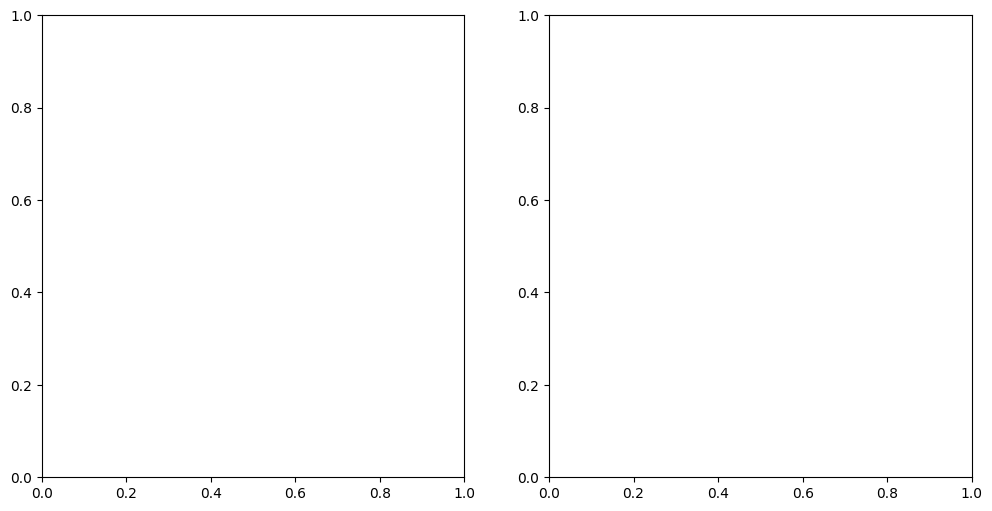

In [118]:
# Step 5: Visualize the original image and HOG image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

In [119]:
# Plot original image
ax1.imshow(image) # Changed image_rgb to image
ax1.axis('off')
ax1.set_title('Original Image')

Text(0.5, 1.0, 'Original Image')

In [120]:
# Plot HOG features image
ax2.imshow(hog_image_rescaled, cmap='gray')
ax2.axis('off')
ax2.set_title('HOG Image')

Text(0.5, 1.0, 'HOG Image')

In [121]:
# Show the plot
plt.show()

**HOG + SVM for Human Detection:**

No detections found.


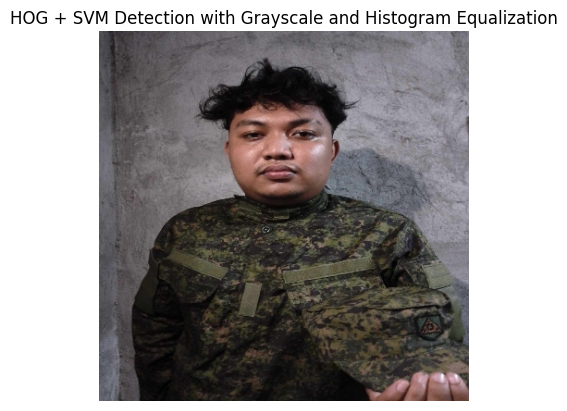

In [122]:
# Initialize the HOG descriptor with the default people detector (pre-trained SVM)
hog_descriptor = cv2.HOGDescriptor()
hog_descriptor.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# Convert the image to grayscale
gray_image = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)

# Apply histogram equalization to improve contrast
gray_image = cv2.equalizeHist(gray_image)

# Detect people using HOG + SVM with adjusted parameters
rects, weights = hog_descriptor.detectMultiScale(gray_image,
                                                 winStride=(1, 1),
                                                 padding=(2, 2),
                                                 scale=1.5)

# Check if any detections are found
if len(rects) > 0:
    # If detections are found, draw bounding boxes
    for (x, y, w, h) in rects:
        cv2.rectangle(image_resized, (x, y), (x + w, y + h), (0, 255, 0), 2)
    print(f"Detections found: {len(rects)}")
else:
    print("No detections found.")

# Display the result
plt.imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))
plt.title('HOG + SVM Detection with Grayscale and Histogram Equalization')
plt.axis('off')
plt.show()

**Exercise 2: YOLO Object Detection**

In [12]:
# Install necessary dependencies for YOLO
!pip install tensorflow opencv-python-headless

In [13]:
# Step 1: Download pre-trained YOLOv3 weights and configuration
!wget https://pjreddie.com/media/files/yolov3.weights
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names

--2024-10-15 13:18:31--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  2.70MB/s    in 3m 50s  

2024-10-15 13:22:26 (1.03 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2024-10-15 13:22:26--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      

2

In [14]:
# Step 2: Load YOLOv3 model using OpenCV
import cv2
import numpy as np

In [17]:
# Load YOLO model
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
layer_names = net.getLayerNames()
# Get the index of the output layer
output_layer_index = net.getUnconnectedOutLayers()
# Access the layer name using the index directly
output_layers = [layer_names[output_layer_index[0] - 1]]

In [18]:
# Load class names
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

In [19]:
# Step 3: Load an image and perform object detection
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)
image_resized = cv2.resize(image, (400, 400))
height, width, channels = image_resized.shape

Saving kuto.jpg to kuto (1).jpg


In [20]:
# Create blob from image
blob = cv2.dnn.blobFromImage(image_resized, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)

In [21]:
# Forward pass to get detections
outs = net.forward(output_layers)

In [22]:
# Step 4: Visualize bounding boxes and class labels
class_ids, confidences, boxes = [], [], []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:  # Filter weak detections
            center_x, center_y = int(detection[0] * width), int(detection[1] * height)
            w, h = int(detection[2] * width), int(detection[3] * height)
            x, y = int(center_x - w / 2), int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [24]:
# Apply Non-Maximum Suppression (NMS) to filter multiple boxes
indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

for i in indices:
    if isinstance(i, np.ndarray):
        i = i[0]
    x, y, w, h = boxes[i]
    label = str(classes[class_ids[i]])
    cv2.rectangle(image_resized, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(image_resized, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

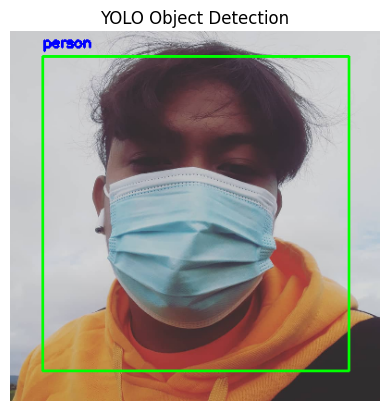

In [25]:
# Display the image
plt.imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))
plt.title('YOLO Object Detection')
plt.axis('off')
plt.show()

**Exercise 3: SSD Object Detection**

In [26]:
# Install TensorFlow and necessary dependencies for SSD
!pip install tensorflow opencv-python-headless

In [27]:
# Step 1: Download pre-trained SSD MobileNet model from TensorFlow Model Zoo
!wget http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_coco_2018_03_29.tar.gz
!tar -xvzf ssd_mobilenet_v2_coco_2018_03_29.tar.gz

--2024-10-15 13:26:41--  http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_coco_2018_03_29.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.142.207, 74.125.195.207, 172.253.117.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.142.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 187925923 (179M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_coco_2018_03_29.tar.gz’

ssd_mobilenet_v2_co 100%[===================>] 179.22M   174MB/s    in 1.0s    

2024-10-15 13:26:42 (174 MB/s) - ‘ssd_mobilenet_v2_coco_2018_03_29.tar.gz’ saved [187925923/187925923]

ssd_mobilenet_v2_coco_2018_03_29/checkpoint
ssd_mobilenet_v2_coco_2018_03_29/model.ckpt.meta
ssd_mobilenet_v2_coco_2018_03_29/pipeline.config
ssd_mobilenet_v2_coco_2018_03_29/saved_model/saved_model.pb
ssd_mobilenet_v2_coco_2018_03_29/frozen_inference_graph.pb
ssd_mobilenet_v2_coco_2018_03_29/saved_model/
ssd_mobilenet_v2_coco_2018_03

In [28]:
# Load SSD model using TensorFlow
import tensorflow as tf

In [29]:
model = tf.saved_model.load('ssd_mobilenet_v2_coco_2018_03_29/saved_model')

In [42]:
# Load image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)
image_resized = cv2.resize(image, (300, 300))  # SSD requires 300x300 input

Saving snappy.jpg to snappy.jpg


In [43]:
# Convert image to tensor
input_tensor = tf.convert_to_tensor(image_resized)
input_tensor = input_tensor[tf.newaxis, ...]

In [44]:
# Perform object detection
detections = model.signatures['serving_default'](input_tensor)

In [45]:
# Extract bounding boxes and class labels
detection_boxes = detections['detection_boxes'][0].numpy()
detection_classes = detections['detection_classes'][0].numpy().astype(np.int32)
detection_scores = detections['detection_scores'][0].numpy()

In [46]:
# Draw bounding boxes
for i in range(detection_boxes.shape[0]):
    if detection_scores[i] > 0.5:
        box = detection_boxes[i]
        h, w, _ = image_resized.shape
        y1, x1, y2, x2 = box[0] * h, box[1] * w, box[2] * h, box[3] * w
        cv2.rectangle(image_resized, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)

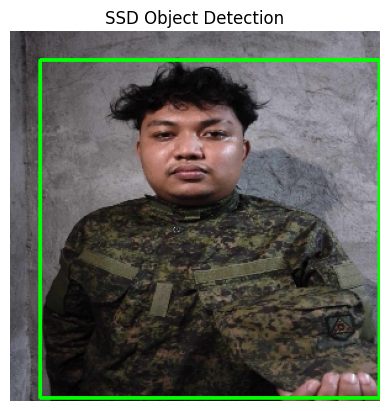

In [47]:
# Display the image
plt.imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))
plt.title('SSD Object Detection')
plt.axis('off')
plt.show()

**Exercise 4: Traditional vs. Deep Learning Object Detection Comparison**

In [48]:
import time

# Time HOG + SVM
start_time = time.time()
# Run HOG + SVM code here
end_time = time.time()
hog_svm_time = end_time - start_time

# Time YOLO
start_time = time.time()
# Run YOLO code here
end_time = time.time()
yolo_time = end_time - start_time

# Time SSD
start_time = time.time()
# Run SSD code here
end_time = time.time()
ssd_time = end_time - start_time

# Print comparison
print(f"HOG + SVM Time: {hog_svm_time} seconds")
print(f"YOLO Time: {yolo_time} seconds")
print(f"SSD Time: {ssd_time} seconds")

HOG + SVM Time: 5.125999450683594e-05 seconds
YOLO Time: 3.695487976074219e-05 seconds
SSD Time: 3.647804260253906e-05 seconds
